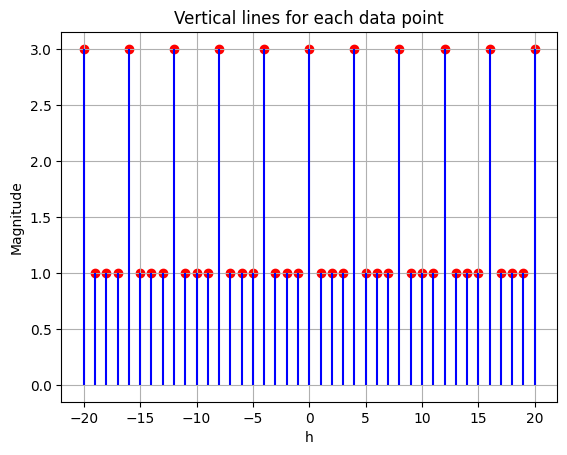

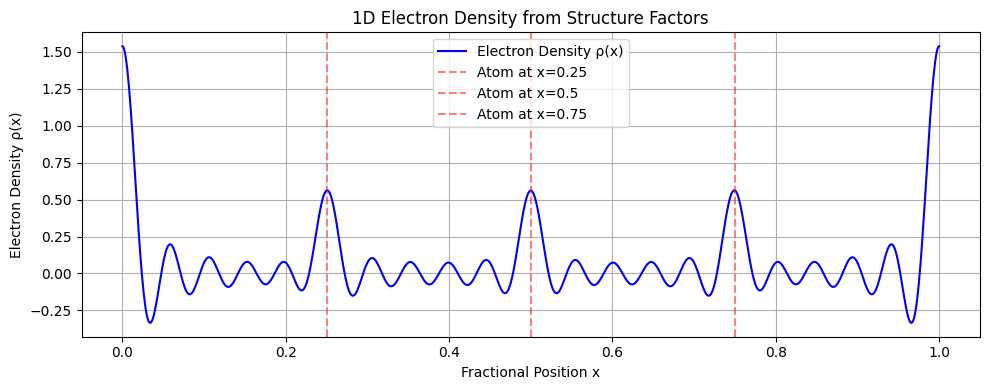

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define 1D unit cell
# It has fractional coordinates scaled in the range [0,1]
num_points = 1000
x = np.linspace(0, 1, num_points)


# Number of reflections to be produced 
# A 1D Miller index (h)
max_h = 20 


# Define atomic positions and atomic scattering factors
# Format: (position in fractional units, atomic scattering factor)
atoms = [(0.25, 1.0), 
         (0.5, 1.0),
         (0.75, 1.0)]


# Function to compute structure factors F_h from electron density 
# Crystal -> structure factors
def compute_structure_factors():
    F_h = {}
    
    for h in range(-max_h, max_h + 1):
        F = 0.0
        
        # a_x: position in fractional unit = x_j
        # a_f: atomic scattering factor = f_j
        for a_x, a_f in atoms:
            F += a_f * np.exp(2j*np.pi*h*a_x)
        
        F_h[h] = np.abs(F)

    return F_h


# Function to compute electron density ρ(x) from structure factors F_h
# Structure factors -> crystal
def compute_electron_density(F_h):
    rho = np.zeros_like(x, dtype=np.complex128)
    
    for h, F in F_h.items():
        rho += F * np.exp(-2j*np.pi*h*x)

    # Normalization of the electrion density by the 'unit cell volume'
    rho_real = rho.real / len(F_h) 
    
    return rho_real


# Calculate structure factors from the real unit cell (crystal)
# This is the simulation of the X-ray diffraction experiment
F_h = compute_structure_factors()

# Plot structure factors
plt.vlines(list(F_h.keys()), ymin=0, ymax=list(F_h.values()), colors='blue')
plt.scatter(list(F_h.keys()), list(F_h.values()), color='red')

plt.xlabel('h')
plt.ylabel('Magnitude')
plt.title('Vertical lines for each data point')
plt.grid(True)
plt.show()



# Reconstruct electron density in the unit cell from the structure factors
rho = compute_electron_density(F_h)

# Plot reconstructed electrond density
plt.figure(figsize=(10, 4))
plt.plot(x, rho, label='Electron Density ρ(x)', color='blue')
for pos, _ in atoms:
    plt.axvline(pos, color='red', linestyle='--', alpha=0.5, label=f'Atom at x={pos}')
plt.title('1D Electron Density from Structure Factors')
plt.xlabel('Fractional Position x')
plt.ylabel('Electron Density ρ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Impact of the atomic scattering factor f

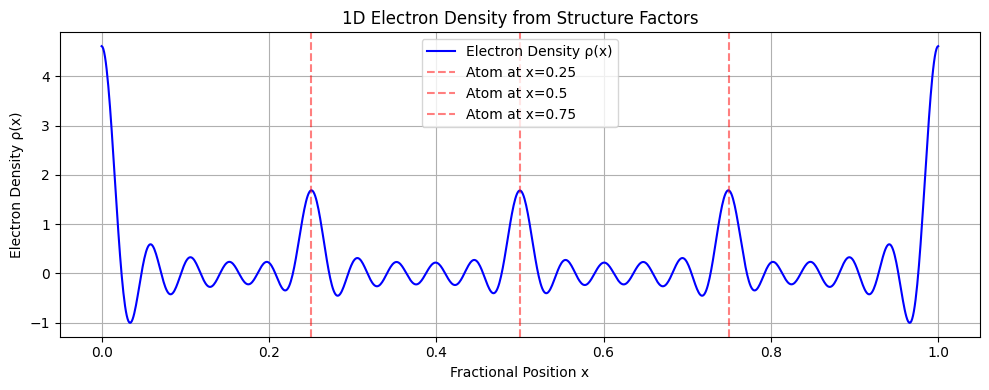

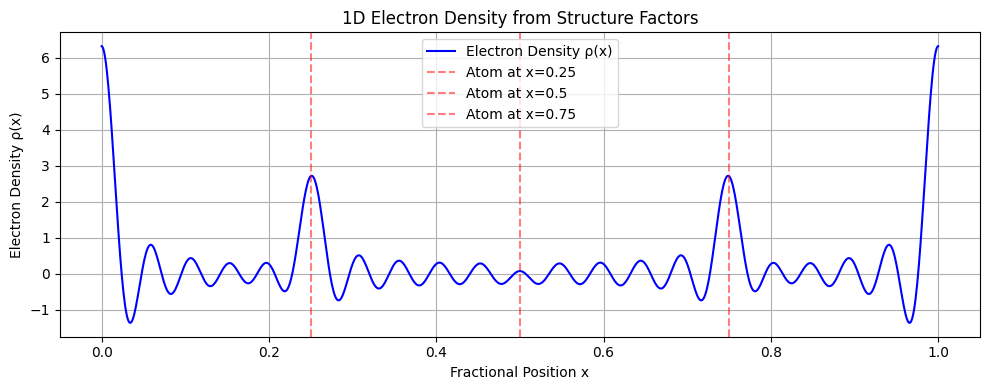

In [2]:
# Play around with the atomic scattering factor f
# Define atomic positions and atomic scattering factors
# Format: (position in fractional units, atomic scattering factor)
atoms = [(0.25, 3.0), 
         (0.5, 3.0),
         (0.75, 3.0)]

# Calculate structure factors from the real unit cell (crystal)
# This is the simulation of the X-ray diffraction experiment
F_h = compute_structure_factors()

# Reconstruct electron density in the unit cell from the structure factors
rho = compute_electron_density(F_h)

# Plot reconstructed electrond density
plt.figure(figsize=(10, 4))
plt.plot(x, rho, label='Electron Density ρ(x)', color='blue')
for pos, _ in atoms:
    plt.axvline(pos, color='red', linestyle='--', alpha=0.5, label=f'Atom at x={pos}')
plt.title('1D Electron Density from Structure Factors')
plt.xlabel('Fractional Position x')
plt.ylabel('Electron Density ρ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

atoms = [(0.25, 5.0), 
         (0.5, 5.0),
         (0.75, 1.0)]

# Calculate structure factors from the real unit cell (crystal)
# This is the simulation of the X-ray diffraction experiment
F_h = compute_structure_factors()

# Reconstruct electron density in the unit cell from the structure factors
rho = compute_electron_density(F_h)

# Plot reconstructed electrond density
plt.figure(figsize=(10, 4))
plt.plot(x, rho, label='Electron Density ρ(x)', color='blue')
for pos, _ in atoms:
    plt.axvline(pos, color='red', linestyle='--', alpha=0.5, label=f'Atom at x={pos}')
plt.title('1D Electron Density from Structure Factors')
plt.xlabel('Fractional Position x')
plt.ylabel('Electron Density ρ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Generally, a higher f value increases the strength of the scattering for an atom. So increases how strongly an atom scatters X-rays. A heavier atom would have a higher f value. This can result in higher and sharper peaks around the three atoms, as seen if we set f = 3 for each atom. The final electron density plot results from summing up all scattered waves, so we can also have constructive and destructive interference. If the waves sum up, we get higher peaks and have constructive interference, as seen for the first plot. If some waves are cancelled out, we see flattened or reduced peaks, as seen in the second plot. Here, we expected high peaks for atom 1 and 2, since f was set to 5.0, and a lower peak for atom 3, but due to destructive interference, for the second atom the contributions of the structure factor are cancelled out.

## Impact of the resolution max_h

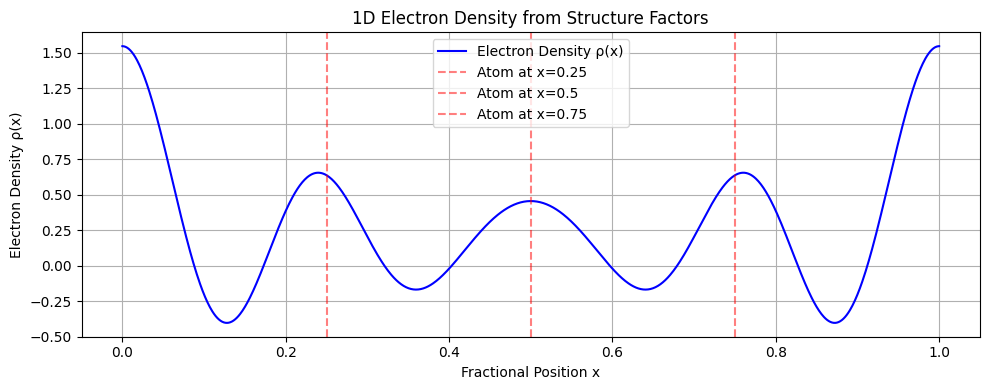

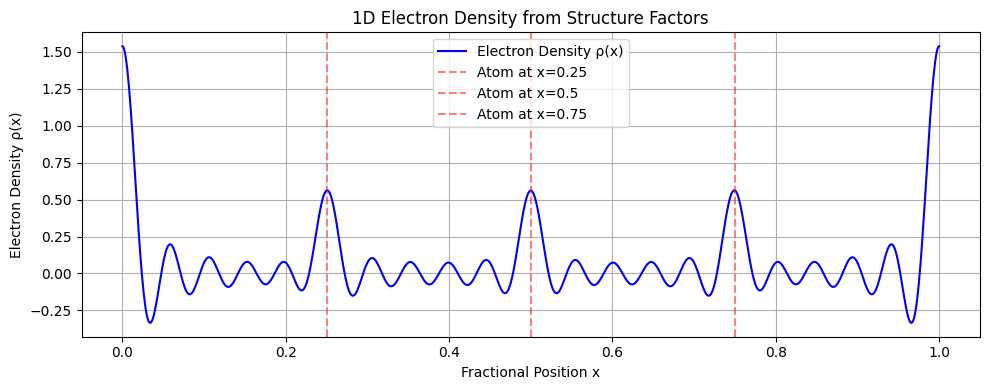

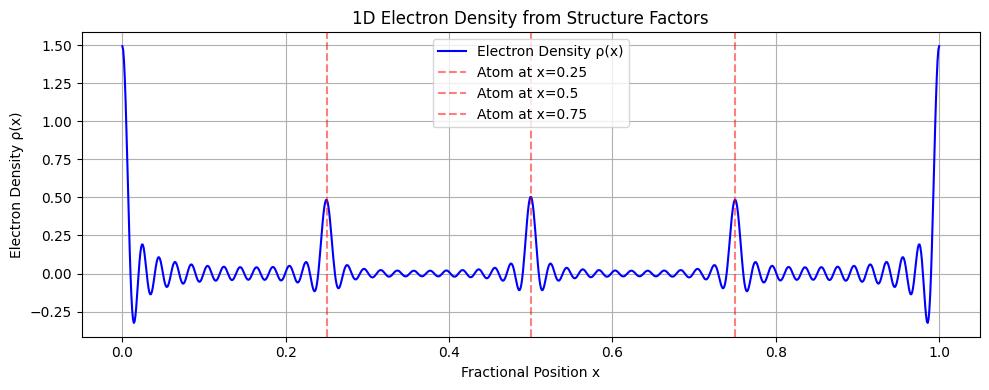

In [3]:
# use original atomic positions and atomic scattering factors
# Format: (position in fractional units, atomic scattering factor)
atoms = [(0.25, 1.0), 
         (0.5, 1.0),
         (0.75, 1.0)]



# Number of reflections to be produced 
# A 1D Miller index (h)
max_h = 5 # low resolution

# Calculate structure factors from the real unit cell (crystal)
# This is the simulation of the X-ray diffraction experiment
F_h = compute_structure_factors()

# Reconstruct electron density in the unit cell from the structure factors
rho = compute_electron_density(F_h)

# Plot reconstructed electrond density
plt.figure(figsize=(10, 4))
plt.plot(x, rho, label='Electron Density ρ(x)', color='blue')
for pos, _ in atoms:
    plt.axvline(pos, color='red', linestyle='--', alpha=0.5, label=f'Atom at x={pos}')
plt.title('1D Electron Density from Structure Factors')
plt.xlabel('Fractional Position x')
plt.ylabel('Electron Density ρ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

max_h = 20 # Medium resolution

# Calculate structure factors from the real unit cell (crystal)
# This is the simulation of the X-ray diffraction experiment
F_h = compute_structure_factors()

# Reconstruct electron density in the unit cell from the structure factors
rho = compute_electron_density(F_h)

# Plot reconstructed electrond density
plt.figure(figsize=(10, 4))
plt.plot(x, rho, label='Electron Density ρ(x)', color='blue')
for pos, _ in atoms:
    plt.axvline(pos, color='red', linestyle='--', alpha=0.5, label=f'Atom at x={pos}')
plt.title('1D Electron Density from Structure Factors')
plt.xlabel('Fractional Position x')
plt.ylabel('Electron Density ρ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

max_h = 50 # High resolution

# Calculate structure factors from the real unit cell (crystal)
# This is the simulation of the X-ray diffraction experiment
F_h = compute_structure_factors()

# Reconstruct electron density in the unit cell from the structure factors
rho = compute_electron_density(F_h)

# Plot reconstructed electrond density
plt.figure(figsize=(10, 4))
plt.plot(x, rho, label='Electron Density ρ(x)', color='blue')
for pos, _ in atoms:
    plt.axvline(pos, color='red', linestyle='--', alpha=0.5, label=f'Atom at x={pos}')
plt.title('1D Electron Density from Structure Factors')
plt.xlabel('Fractional Position x')
plt.ylabel('Electron Density ρ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Using a max_h value of 5 corresponds to low resolution data (less reflections). In the 1D electron density plot this translates to smooth, low frequency waves. We have broad hills, rather than sharp peaks, which can make distinguishing the atoms difficult. 
Higher max_h values, in our example a value of 50 (last plot), correspond to higher resolution data (more reflections). We get high, narrow, and easily distinguishable peaks. A mediun value of 20 shows the middle ground between the two extremes. The peaks aren't as sharp as for max_h = 50, but the peaks for the different atoms are still clearly separated. A really high resolution is often not realistic in practice, so being able to interpret the medium resolution is very good. 